# Training a neural network for XOR using ES(1+1) with 1/5 rule
- 9 weight values to optimize
- Use sigmod activation function for all neurons
- Not generalized for N hidden layers with M neurons for each hidden Layer
- CJ Chung 2022-

### HW3 Assignment Disclaimer
*	Author Name: V Harsha Yellela
*	LTU ID: 000798754
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): Yes
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): 10%
*	Understanding: I understand every part of this code (Yes/No):  Yes
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No): Yes

<image src=https://www.robofest.net/DL/XOR_sigmoid.png width=300>

In [69]:
import numpy as np
from math import exp, tanh
from random import random, gauss
import matplotlib.pyplot as plt

In [70]:
def sigmoid(ws):
  return 1.0 / (1.0 + exp(-1.0*ws))

def stairStep(ws):
  if ws > 0:
    return 1.0
  else:
    return 0

def relu(ws):
  return max(0.0, ws)

def tanh(ws):
  return (exp(ws) - exp(-ws)) / (exp(ws) + exp(-ws))

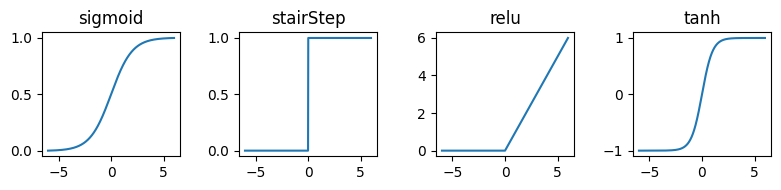

In [71]:
x = np.arange(-6, 6, 0.01) # Grid of 0.01 spacing from -pi to pi
act_fucs = (sigmoid, stairStep, relu, tanh)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(act_fucs), figsize=(8, 2)) # 1 row, 4 columns, smaller figure size

# Plot each activation function in a subplot
for i, act_fuc in enumerate(act_fucs):
  y = [act_fuc(val) for val in x] # List comprehension
  axes[i].plot(x, y)
  axes[i].set_title(act_fuc.__name__) # Set title to function name

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

In [72]:
# inputs are       a, b, 1 (bias)
input = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]], dtype=float)
desired_out = np.array([0, 1, 1, 0], float)
hidden = np.array([0, 0], float) # to store output of each hidden neuron
test_input = np.array([[0.01, 0, 1],
                      [0, 0.95, 1],
                      [1, 0.05, 1],
                      [0.9, 1, 1]], dtype=float)

In [73]:
# feed forward propagation
def ffp(w, input_arr, i, activation_f): #One hidden layer Feed Forward, i = sample pattern index
  #w = np.array([-0.22086193, -0.02440471,  0.87562968,  1.00092766,  0.17625851,  0.03070678, 1.61655582, -0.7638391,   1.09391015])
  m = 0 #index for 9 weights
  for j in range(len(hidden)):
    hidden[j] = 0.0
    for k in range(3):
    # ---------- complete the missing lines below ------------------------------
        hidden[j] += w[m] * input_arr[i][k]
        m += 1
    hidden[j] = activation_f(hidden[j])

  NN_output = 0.0
  # Add the bias weight for the output neuron
  NN_output += w[m] * 1.0
  m += 1
  for j in range(len(hidden)):
      NN_output += w[m] * hidden[j]
      m += 1
  NN_output = activation_f(NN_output)
  return NN_output

def objFunc(x, input_arr, act_fn):
  errSum = 0.0
  for i in range(4):
  # ---------- complete the missing lines below --------------------------------
    y = ffp(x, input_arr, i, act_fn)
    err = (desired_out[i] - y) ** 2
    errSum += err

  return errSum

In [74]:
def verify(w, act_fn):
  print('\t***** To verify if the w vector above is correct *****')
  for i in range(4):
    y = ffp(w, test_input, i, act_fn)
    # Iterate through input elements for printing
    input_str = ' '.join([f'{x:.2f}' for x in test_input[i]])
    print(f'\t   Test Input: [{input_str}] \tOutput: {y:.1f}')

w1 = np.array([1.7299660387120122, 3.04021437773799, -1.20526745645984, -1.6385111908431627, -2.578129126967211, 3.0036521877830995, 2.505440178023749, 2.5067862885975645, -0.40169355047449445]) # from tanh
w2 = np.array([1.0, 1.0, -0.5, -1.0, -1.0, 1.5, 1.0, 1.0, -1.5]) # works with stairStep
w3 = np.array([15.777498706166504, -13.170463800361835, 6.928145681894125, -9.78751875599886, 15.038835851148951, 8.05298888101147, -11.903670377654652, -14.490754747951865, 19.817246873788978])
verify(w1, tanh)
verify(w2, stairStep)
verify(w3, sigmoid)

	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 0.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


In [75]:
def es_1115 (numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out):
  p = np.zeros(numVar)
  o = np.zeros(numVar)
  #mut_list = np.array([])
  sucessCnt = 0

  # Initialize parent solution
  for j in range(numVar):
    p[j] = low + random() * (high-low)
  parentVal = objFunc(p, input, act_fn)

  for gen in range(1, maxGen+1):
    if gen % windowSize == 0: #update step size
      if sucessCnt > windowSize * 0.2:
        stepSize /= 0.82 #increase
      elif sucessCnt < windowSize * 0.2:
        stepSize *= 0.82 #decrease
      sucessCnt = 0

    # Reproduce (create child)
    for j in range(numVar):
      o[j] = p[j] + gauss(0.0, stepSize)
      o[j] = np.clip(o[j], low, high)

    # Evaluate child
    childVal = objFunc(o, input, act_fn)

    # Selection
    if childVal < parentVal:
      #Child becomes a parent for next generation
      for j in range(numVar):
        p[j] = o[j]
      parentVal = childVal
      sucessCnt+=1

    if gen > 1000 and parentVal > 1.0:
      return p, parentVal, gen, False # No hope

    if parentVal < 0.00005:
      return p, parentVal, gen, True # Acceptable solution found

  return p, parentVal, maxGen, False # Reached max generations

In [76]:
def plot_decision_boundary(best_solution, act_fn, title="Decision Boundary (XOR)", success=True):
    x_min, x_max = 0.0, 1.0
    y_min, y_max = 0.0, 1.0
    step = 0.01  # finer resolution
    xx, yy = np.meshgrid(np.arange(x_min, x_max+step, step),
                         np.arange(y_min, y_max+step, step))

    Z = np.zeros_like(xx, dtype=float)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            inp = np.array([xx[i, j], yy[i, j], 1.0])
            Z[i, j] = ffp(best_solution, [inp], 0, act_fn)

    Z_class = (Z > 0.5).astype(int)

    plt.figure(figsize=(6,6))
    
    # Create custom colormap with yellow (for 0) and blue (for 1)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'blue'])
    
    plt.imshow(Z_class, cmap=custom_cmap, origin='lower',
               extent=(x_min, x_max, y_min, y_max), interpolation='nearest')

    # XOR training points
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0,1,1,0])
    for (x1, x2), y in zip(X, Y):
        c = "red" if y == 0 else "white"
        plt.scatter(x1, x2, c=c, edgecolors="k", s=120, marker="s")

    # Title color based on success
    tcolor = "green" if success else "red"
    plt.title(f"{title}", color=tcolor)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # Save automatically
    fname = f"Trial{trial}_DB.png"
    plt.savefig(fname)
    plt.show()


Trial = 1,	0.5000842695896695
Trial = 2,	0.6667005664076796
Trial = 3, Acceptable solution found at generation 270
	 w[0]: -16.646457168137612
	 w[1]: -9.532075311428038
	 w[2]: 0.8270096911926132
	 w[3]: 10.788821263167003
	 w[4]: 8.97497977343697
	 w[5]: -17.185629512098217
	 w[6]: 6.049499713065859
	 w[7]: -19.329145308558168
	 w[8]: -17.600428362316354
	SSE = 1.1875752602743496e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0
Trial = 2,	0.6667005664076796
Trial = 3, Acceptable solution found at generation 270
	 w[0]: -16.646457168137612
	 w[1]: -9.532075311428038
	 w[2]: 0.8270096911926132
	 w[3]: 10.788821263167003
	 w[4]: 8.97497977343697
	 w[5]: -17.185629512098217
	 w[6]: 6.049499713065859
	 w[7]: -19.329145308558168
	 w[8]: -17.600428362316354
	SSE = 1.1875752602743496e-05
	***** To ve

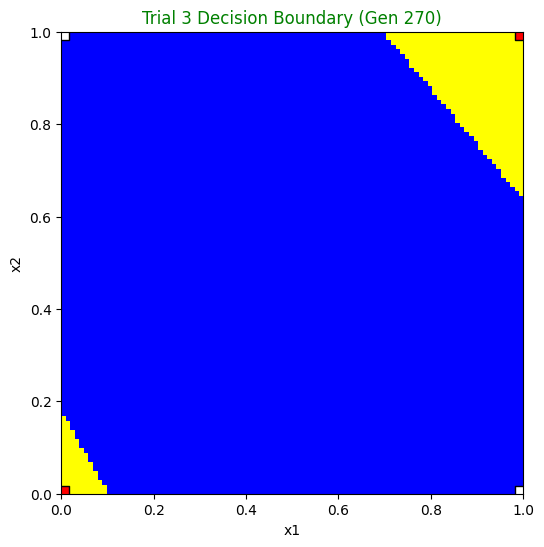

Trial = 4, Acceptable solution found at generation 155
	 w[0]: 17.489406073411963
	 w[1]: 9.101112417314207
	 w[2]: -3.322466651607665
	 w[3]: 12.784230650123716
	 w[4]: 5.39252099124446
	 w[5]: -17.1568004687586
	 w[6]: -5.50342185793803
	 w[7]: 12.542806399136138
	 w[8]: -17.52955452049814
	SSE = 4.958255308829141e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.4


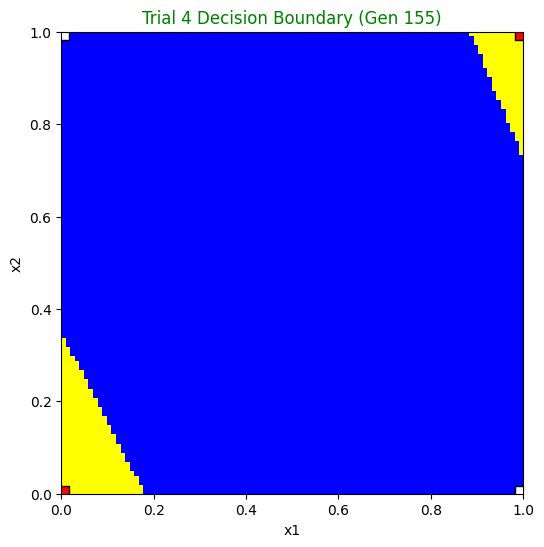

Trial = 5,	1.0000014648718063	 Terminated, since no hope
Trial = 6,	0.5000569962735849
Trial = 6,	0.5000569962735849
Trial = 7,	0.6666664734008023
Trial = 8, Acceptable solution found at generation 359
	 w[0]: 7.504702360161418
	 w[1]: 6.8811062510690135
	 w[2]: -11.391064354339278
	 w[3]: -13.758489805098439
	 w[4]: -7.789185836635139
	 w[5]: 2.246638342610651
	 w[6]: 5.881076767788687
	 w[7]: -12.084143470674523
	 w[8]: -12.920416685413482
	SSE = 4.5626015753752706e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0
Trial = 7,	0.6666664734008023
Trial = 8, Acceptable solution found at generation 359
	 w[0]: 7.504702360161418
	 w[1]: 6.8811062510690135
	 w[2]: -11.391064354339278
	 w[3]: -13.758489805098439
	 w[4]: -7.789185836635139
	 w[5]: 2.246638342610651
	 w[6]: 5.881076767788687
	 w[7]: -12

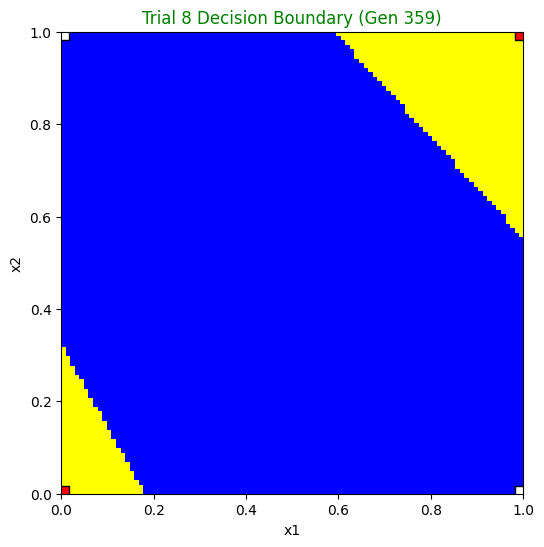

Trial = 9,	0.5000800105323387
Trial = 10,	2.0	 Terminated, since no hope
Trial = 11,	0.6668523542135429
Trial = 11,	0.6668523542135429
Trial = 12,	0.5000293973848863
Trial = 13, Acceptable solution found at generation 194
	 w[0]: 20.0
	 w[1]: 17.447067843401044
	 w[2]: -1.3689316129678972
	 w[3]: 9.39093112276866
	 w[4]: 10.46017195190355
	 w[5]: -14.70048281500288
	 w[6]: -10.65051737632501
	 w[7]: 16.305641342957298
	 w[8]: -11.36668758698054
	SSE = 4.3169980264153507e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0
Trial = 12,	0.5000293973848863
Trial = 13, Acceptable solution found at generation 194
	 w[0]: 20.0
	 w[1]: 17.447067843401044
	 w[2]: -1.3689316129678972
	 w[3]: 9.39093112276866
	 w[4]: 10.46017195190355
	 w[5]: -14.70048281500288
	 w[6]: -10.65051737632501
	 w[7]: 16.3056413429

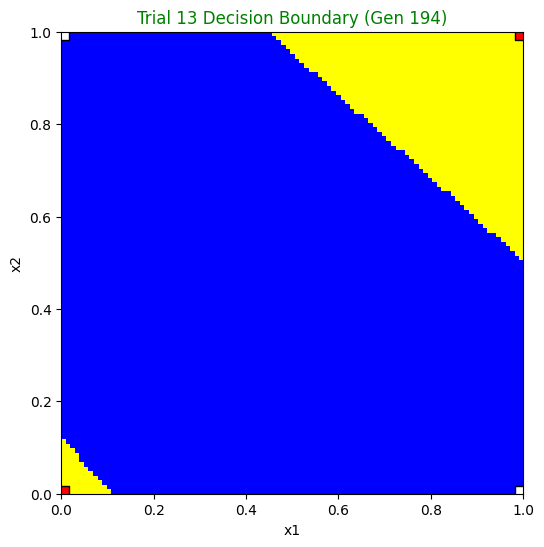

Trial = 14,	0.6667174878514491
Trial = 15, Acceptable solution found at generation 1741
	 w[0]: -10.692149473677931
	 w[1]: 10.488114950319744
	 w[2]: -7.9298624097694885
	 w[3]: 7.645819643442586
	 w[4]: -6.196059489009831
	 w[5]: -4.709962991133537
	 w[6]: -5.795570323652672
	 w[7]: 13.567227096549262
	 w[8]: 12.140984365202781
	SSE = 4.5823103015751445e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


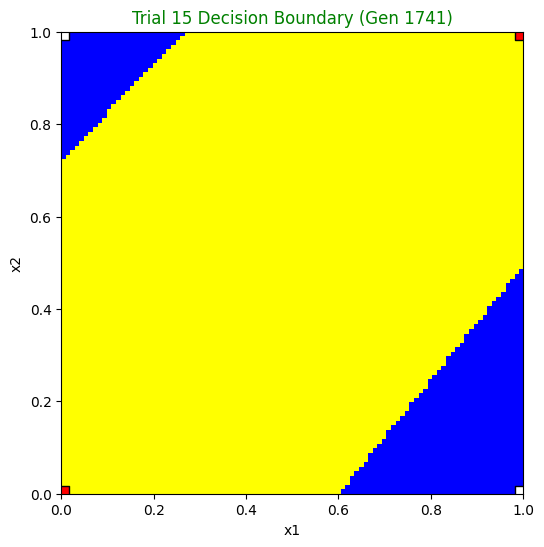

Trial = 16, Acceptable solution found at generation 6239
	 w[0]: -14.198892558621214
	 w[1]: 14.650907608066
	 w[2]: 9.767495571399781
	 w[3]: 14.173494931912831
	 w[4]: -16.43350201678835
	 w[5]: 12.310366819981818
	 w[6]: 17.283150718640123
	 w[7]: -11.6003068935073
	 w[8]: -11.38820374568201
	SSE = 4.845807214905708e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


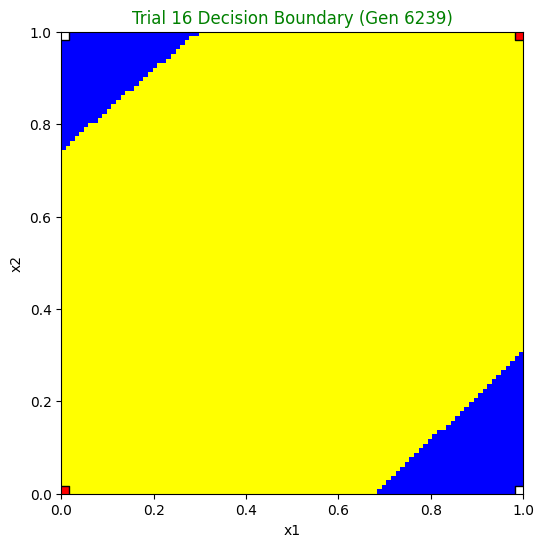

Trial = 17,	0.5000336371723688
Trial = 18,	0.6666851195241669
Trial = 18,	0.6666851195241669
Trial = 19,	0.6667021326600197
Trial = 19,	0.6667021326600197
Trial = 20,	0.5000429372817162
Trial = 20,	0.5000429372817162
Trial = 21,	0.6666908128994542
Trial = 21,	0.6666908128994542
Trial = 22,	0.5000174850631227
Trial = 22,	0.5000174850631227
Trial = 23,	0.5000064374538343
Trial = 23,	0.5000064374538343
Trial = 24,	0.5000138602320088
Trial = 25, Acceptable solution found at generation 242
	 w[0]: 19.9941107985763
	 w[1]: -8.709511428043985
	 w[2]: -15.547415779489754
	 w[3]: -11.293155546793741
	 w[4]: 19.9100729039401
	 w[5]: -17.21718545851349
	 w[6]: -5.523013660830182
	 w[7]: 11.510148257830034
	 w[8]: 12.927777248965873
	SSE = 4.7765900151513536e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0

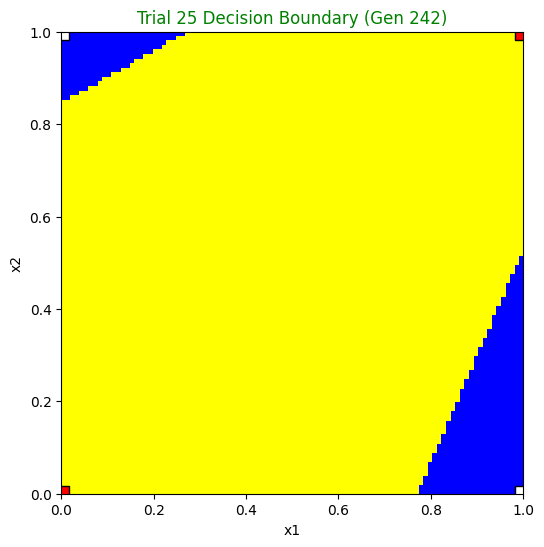

System Success: 28.0%


In [77]:
totGen = 0
foundCnt = 0
maxGen = 20000
maxTrial = 25

numVar = 9
act_fn = sigmoid # Keras could not find the optimized NN with sigmoid
low = -20.0 # -5 and 5 did not work
high = 20.0

#for 1/5 rule
windowSize = 50 # When 30, 14%; 40-16%, 50-22%
stepSize = 0.82

for trial in range(1, maxTrial+1):
  # Seed the random number generator with the current system time for each trial
  # np.random.seed(int(time.time())) No need. If the seed() function is not explicitly
  # called, the default seed value is derived from the current system time.

  best_solution, best_error, generations, success = es_1115 (
      numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out
  )

  if success:
    print(f'Trial = {trial}, Acceptable solution found at generation {generations}')
    for j in range(numVar):
      print(f"\t w[{j}]: {best_solution[j]}")
    print(f"\tSSE = {best_error}")

    verify(best_solution, act_fn)
    totGen += generations
    foundCnt += 1

    # Plot the decision boundary for the successful trial
    plot_decision_boundary(best_solution, act_fn, f'Trial {trial} Decision Boundary (Gen {generations})')

  elif generations == 1001:
    print(f'Trial = {trial},\t{best_error}\t Terminated, since no hope')
  elif generations == maxGen:
    print(f'Trial = {trial},\t{best_error}')
print(f'System Success: {foundCnt*100/maxTrial:.1f}%')